In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.7 which is incompatible.


In [2]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

### 3. Get Enviromental Info

In [4]:
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### Basic Enviroment Info

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


## Watch An Untrain Agent Play A Few Games

In [7]:
from dqn_agent import Agent as Double
from ddqn_agent import Agent as Dueling
from pdqn_agent import Agent as Prioritized

agent_double_Q = Double(state_size=37, action_size=4, seed=0)
agent_dueling_Q = Dueling(state_size=37, action_size=4, seed=0)
agent_Prioritized_Q = Prioritized(state_size=37, action_size=4, seed=0)

for j in range(10):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent_double_Q.act(state)                      # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break

    print("Score: {}".format(score))

Score: 0.0
Score: 0.0
Score: 0.0
Score: 0.0
Score: -1.0
Score: 0.0
Score: 0.0
Score: 0.0
Score: 0.0
Score: -1.0


## 4. Train Agent with Double Q learning

In [8]:
def dqn(n_episodes=1500, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    maxscore = 13                      # used to save maximum score we have
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        
        while True:                                        # Play until episode is finished
            action = agent_double_Q.act(state, eps)                 # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            score += reward                                # update the score
            agent_double_Q.step(state, action, reward, next_state, done)
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=maxscore:
            maxscore = np.mean(scores_window) + 1
            print('\nGreat score in {:d} episodes saving!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent_double_Q.qnetwork_local.state_dict(), 'deep_checkpoint.pth')
            #break
    return scores

scores_dqn = dqn()


Episode 100	Average Score: 0.75
Episode 200	Average Score: 4.54
Episode 300	Average Score: 7.90
Episode 400	Average Score: 10.63
Episode 475	Average Score: 13.06
Great score in 375 episodes saving!	Average Score: 13.06
Episode 500	Average Score: 13.14
Episode 596	Average Score: 14.11
Great score in 496 episodes saving!	Average Score: 14.11
Episode 600	Average Score: 14.17
Episode 687	Average Score: 15.18
Great score in 587 episodes saving!	Average Score: 15.18
Episode 700	Average Score: 14.91
Episode 800	Average Score: 15.55
Episode 900	Average Score: 15.04
Episode 1000	Average Score: 15.86
Episode 1100	Average Score: 15.51
Episode 1200	Average Score: 15.62
Episode 1266	Average Score: 16.18
Great score in 1166 episodes saving!	Average Score: 16.18
Episode 1300	Average Score: 15.88
Episode 1400	Average Score: 15.61
Episode 1500	Average Score: 15.81


## 5. Train Agent with Dueling Q-Learning

In [9]:
def ddqn(n_episodes=1500, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Dueling Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    maxscore = 10                      # used to save maximum score we have
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        
        while True:                                        # Play until episode is finished
            action = agent_dueling_Q.act(state, eps)                 # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            score += reward                                # update the score
            agent_dueling_Q.step(state, action, reward, next_state, done)
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=maxscore:
            maxscore = np.mean(scores_window) + 1
            print('\nGreat score in {:d} episodes saving!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent_dueling_Q.qnetwork_local.state_dict(), 'dueling_checkpoint.pth')
            #break
    return scores

scores_ddnq = ddqn()


Episode 100	Average Score: 0.88
Episode 200	Average Score: 4.72
Episode 300	Average Score: 7.37
Episode 400	Average Score: 9.81
Episode 406	Average Score: 10.04
Great score in 306 episodes saving!	Average Score: 10.04
Episode 449	Average Score: 11.04
Great score in 349 episodes saving!	Average Score: 11.04
Episode 488	Average Score: 12.07
Great score in 388 episodes saving!	Average Score: 12.07
Episode 500	Average Score: 12.01
Episode 600	Average Score: 12.23
Episode 700	Average Score: 12.73
Episode 717	Average Score: 13.07
Great score in 617 episodes saving!	Average Score: 13.07
Episode 771	Average Score: 14.13
Great score in 671 episodes saving!	Average Score: 14.13
Episode 800	Average Score: 13.93
Episode 900	Average Score: 13.86
Episode 1000	Average Score: 14.59
Episode 1100	Average Score: 13.99
Episode 1200	Average Score: 13.52
Episode 1300	Average Score: 13.45
Episode 1400	Average Score: 13.66
Episode 1500	Average Score: 14.30


## 6. Train Agent with Prioritized Q-Learning

In [10]:
def pdqn(n_episodes=1500, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Prioritized Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    maxscore = 7                      # used to save maximum score we have
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        
        while True:                                        # Play until episode is finished
            action = agent_Prioritized_Q.act(state, eps)                 # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            score += reward                                # update the score
            agent_Prioritized_Q.step(state, action, reward, next_state, done)
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=maxscore:
            maxscore = np.mean(scores_window) + 1
            print('\nGreat score in {:d} episodes saving!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent_Prioritized_Q.qnetwork_local.state_dict(), 'prioritized_checkpoint.pth')
            #break
    return scores

scores_pdnq = pdqn()


Episode 100	Average Score: 0.52
Episode 200	Average Score: 2.27
Episode 300	Average Score: 4.23
Episode 400	Average Score: 5.14
Episode 500	Average Score: 4.98
Episode 600	Average Score: 5.05
Episode 700	Average Score: 5.17
Episode 800	Average Score: 6.02
Episode 900	Average Score: 5.26
Episode 1000	Average Score: 4.90
Episode 1097	Average Score: 7.00
Great score in 997 episodes saving!	Average Score: 7.00
Episode 1100	Average Score: 6.96
Episode 1200	Average Score: 6.39
Episode 1300	Average Score: 6.42
Episode 1400	Average Score: 6.75
Episode 1500	Average Score: 6.73


## 7. Compare Double, Dueling and Prioritized learning

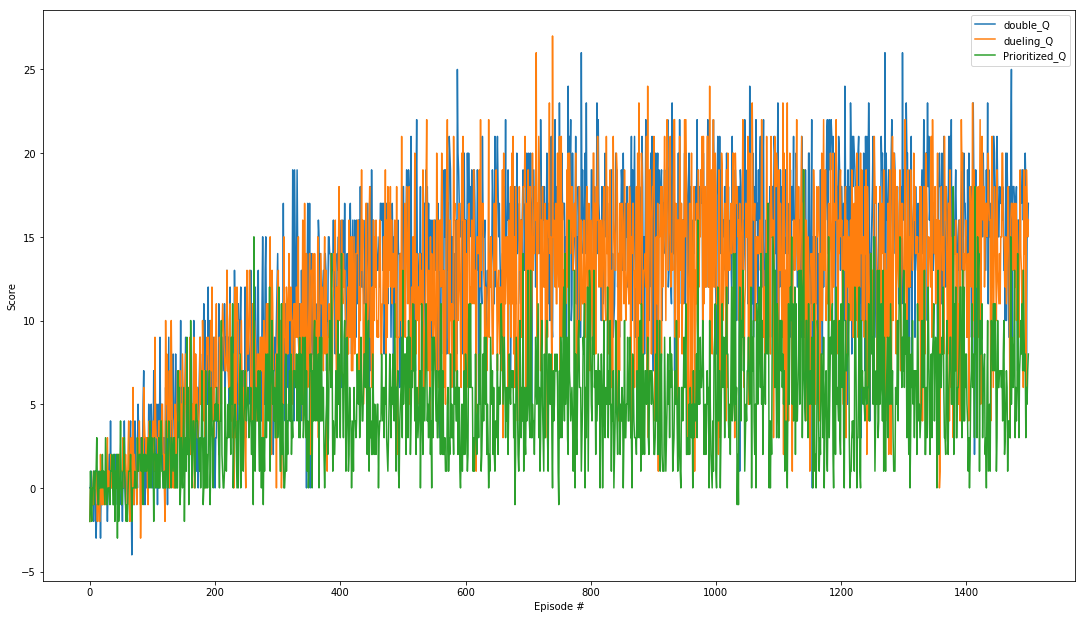

In [26]:
# # plot the scores
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_dqn)), scores_dqn, label='double_Q')
plt.plot(np.arange(len(scores_ddnq)), scores_ddnq, label='dueling_Q')
plt.plot(np.arange(len(scores_pdnq)), scores_pdnq, label='Prioritized_Q')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

### 8. Load Trained Agent And Play 

In [28]:
agent_double_Q = Double(state_size=37, action_size=4, seed=0)
double_checkpoint = 'deep_checkpoint.pth'

agent_dueling_Q = Dueling(state_size=37, action_size=4, seed=0)
dueling_checkpoint = 'dueling_checkpoint.pth'

agent_Prioritized_Q = Prioritized(state_size=37, action_size=4, seed=0)
prioritized_checkpoint = 'prioritized_checkpoint.pth'

# load double Q checkpoint weights from file
agent_double_Q.qnetwork_local.load_state_dict(torch.load(double_checkpoint))

agent_dueling_Q.qnetwork_local.load_state_dict(torch.load(dueling_checkpoint))

for j in range(10):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent_double_Q.act(state)                      # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break

    print("Score: {}".format(score))

Score: 14.0
Score: 22.0
Score: 14.0
Score: 18.0
Score: 18.0
Score: 21.0
Score: 22.0
Score: 14.0
Score: 14.0
Score: 18.0
